# **1 - Perkenalan**

- Nama : Afifah Rahma Tifani
- Batch : 015 - RMT
- Dataset : Customer Churn Dataset
- Objective : Predict whether customer will churn or not using ANN Model.


Deskripsi dari fitur-fitur dalam dataset:

|Feature Name|Description|
|:--|:--|
|**customerID** |ID of the customers.|
|**gender** |Gender of the customers.|
|**SeniorCitizen** |Whether the customer is a senior citizen or not (1, 0).|
|**Partner** |Whether the customer has a partner or not (Yes, No).|
|**Dependents**|Whether the customer has dependents or not (Yes, No).|
|**tenure** |Number of months the customer has stayed with the company.|
|**PhoneService**|Whether the customer has a phone service or not (Yes, No).|
|**MultipleLines**|Whether the customer has multiple lines or not (Yes, No, No phone service).|
|**InternetService**|Customer’s internet service provider (DSL, Fiber optic, No).|
|**OnlineSecurity** |Whether the customer has online security or not (Yes, No, No internet service).|
|**OnlineBackup** |Whether the customer has online backup or not (Yes, No, No internet service).|
|**DeviceProtection**| Whether the customer has device protection or not (Yes, No, No internet service).|
|**TechSupport**|Whether the customer has tech support or not (Yes, No, No internet service).|
|**StreamingTV** |Whether the customer has streamingTV or not (Yes, No, No internet service).|
|**StreamingMovies** |Whether the customer has streaming movies or not (Yes, No, No internet service).|
|**Contract**|time period of customer's contract (Month-to-Month, One year, Two year).|
|**PaperlessBilling**|Whether the customer has paperless billing or not (Yes, No).|
|**PaymentMethod**|Customer payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).|
|**MonthlyCharges**|Monthly charges of customers.|
|**TotalCharges**|Total charges of customers.|
|**Churn**|Wether customer will churn or not (Yes, No).|


# **2 - Import Libraries**


In [1]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import chi2
from imblearn.combine import SMOTEENN
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

import joblib
import json


# **3 - Data Loading**

In [2]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/afifahrahma/learning_data/main/WA_Fn-UseC_-Telco-Customer-Churn%20(1).csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Duplicate Dataset

df_copy = df.copy()
df_copy

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Check dataset - 1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Dataset memiliki 7043 entries dan 21 kolom. Dengan 18 kolom kategorikal dan 3 kolom numerikal. 
- Karena jumlah entries dan jumlah non-null di tiap kolomnya sama, berarti tidak ada missing values dalam dataset.

Sebelum tahapan preprocessing, kita perlu mengubah tipe data sesuai dengan tipe data yang seharusnya. Kolom `SeniorCitizen` diubah ke object dan kolom `TotalCharges` diubah ke float.

In [5]:
# Change `TotalCharges` type to float and `SeniorCitizen` type to object

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') 
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [6]:
# Check dataset - 2

df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


# **4 - Exploratory Data Analysis**

In [7]:
# See column n-unique

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Text(0.5, 1.0, 'Percentage of Churn')

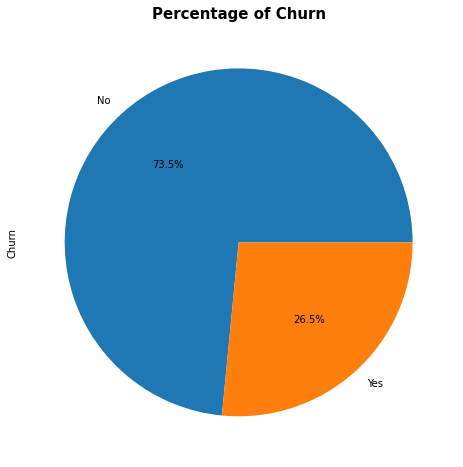

In [8]:
# See value counts of Churn

df.Churn.value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Percentage of Churn', weight='bold', fontsize=15)

- 73.5% customer telco churn, sedangkan 26.5% nya tidak churn.
- Dataset yang kita miliki imbalance, sehingga akan dilakukan handling imbalance pada preprocessing.

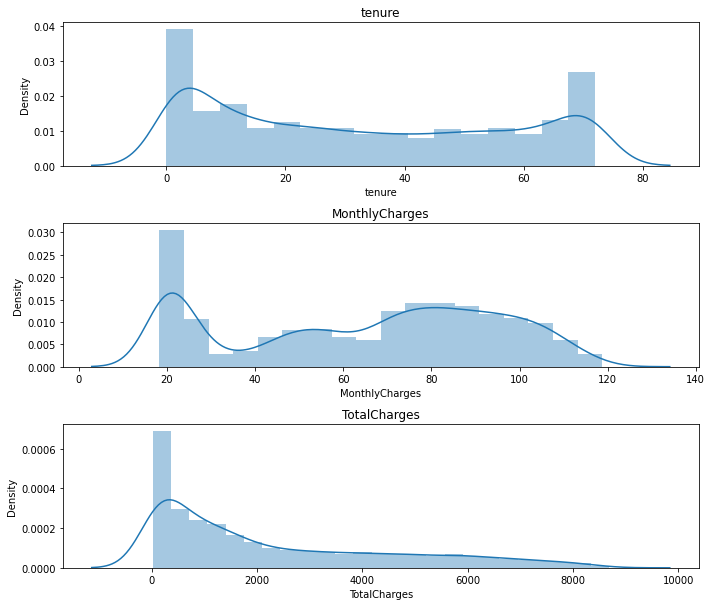

In [9]:
# Histplot of Numerical Columns

num_dat=df[['tenure', 'MonthlyCharges' , 'TotalCharges']]

plt.figure(figsize=(10,50))
for i in range(len(num_dat.columns)):
  plt.subplot(18, 1, i + 1)
  sns.distplot(num_dat[num_dat.columns[i]], kde = True)
  plt.title(num_dat.columns[i])
plt.tight_layout();

- Histogram `tenure` memiliki 2 peak.
- Kolom `TotalCharges` terdistribusi secara skew.

Text(0.5, 1.0, 'Multiple Lines')

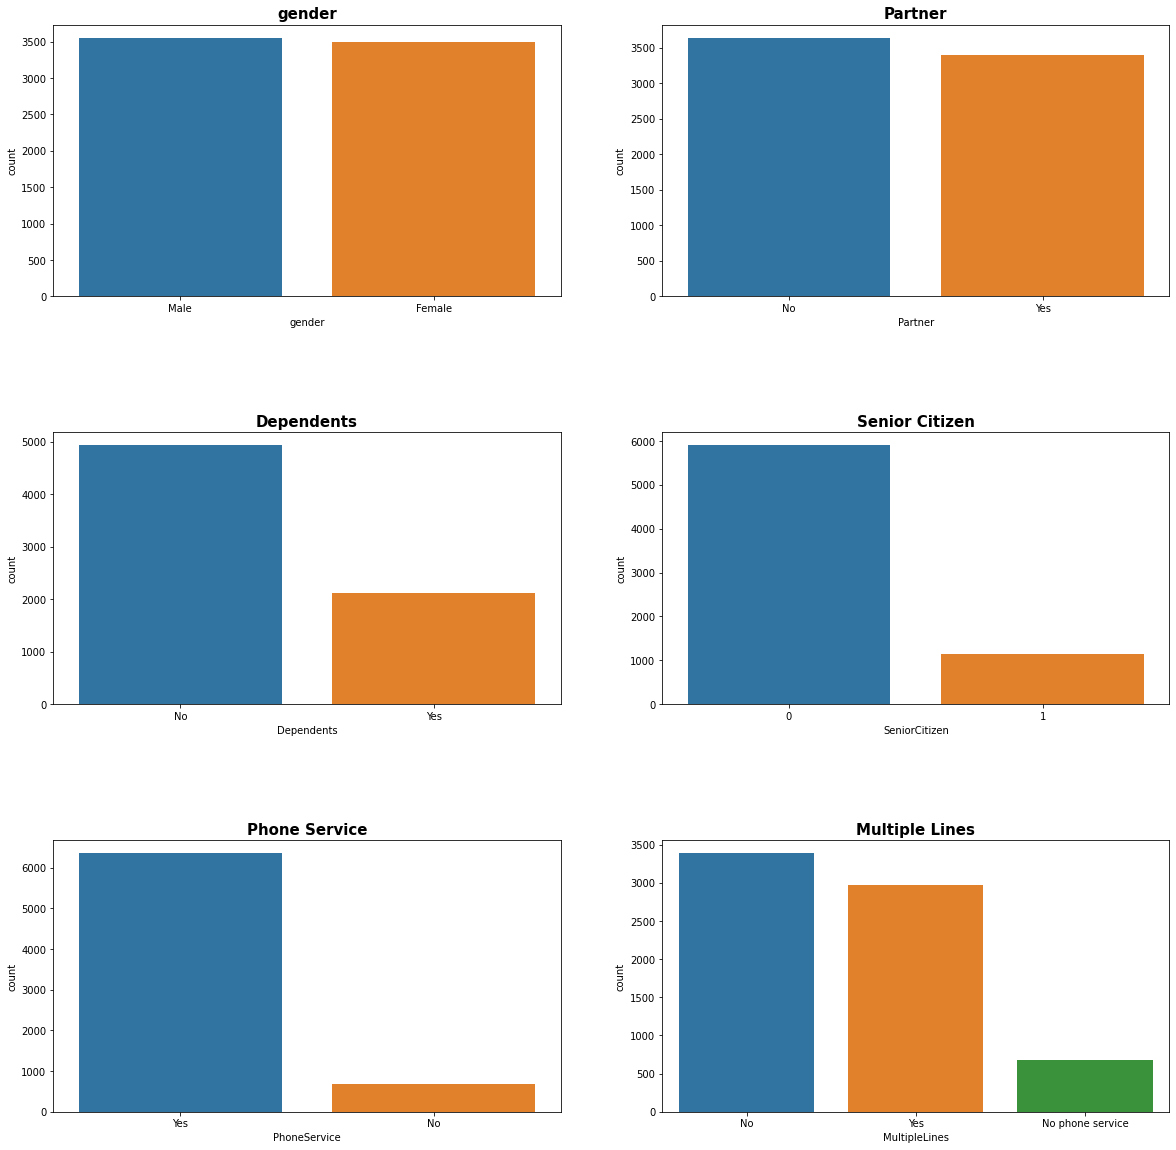

In [10]:
# Plot Categorical Columns

fig,axs = plt.subplots(3,2, figsize = (20,20))
plt.subplot(3, 2, 1)
plt.subplots_adjust(hspace = 0.5)
sns.countplot(x = 'gender',
              data = df,
              order = df['gender'].value_counts().index)
plt.title('gender', weight='bold', fontsize=15)


plt.subplot(3, 2, 2)
sns.countplot(x = 'Partner',
              data = df,
              order = df['Partner'].value_counts().index)
plt.title('Partner', weight='bold', fontsize=15)



plt.subplot(3, 2, 3)
sns.countplot(x = 'Dependents',
              data = df,
              order = df['Dependents'].value_counts().index)
plt.title('Dependents', weight='bold', fontsize=15)


plt.subplot(3, 2, 4)
sns.countplot(x = 'SeniorCitizen',
              data = df,
              order = df['SeniorCitizen'].value_counts().index)
plt.title('Senior Citizen', weight='bold', fontsize=15)


plt.subplot(3, 2, 5)
sns.countplot(x = 'PhoneService',
              data = df,
              order = df['PhoneService'].value_counts().index)
plt.title('Phone Service', weight='bold', fontsize=15)

plt.subplot(3, 2, 6)
sns.countplot(x = 'MultipleLines',
              data = df,
              order = df['MultipleLines'].value_counts().index)
plt.title('Multiple Lines', weight='bold', fontsize=15)


- Jumlah customer Telco yang berjenis kelamin laki-laki dan perempuan tidak jauh berbeda.
- Paling banyak customer Telco tidak memiliki partner.
- Kebanyakan customer Telco tidak memiliki dependents dan bukan merupakan senior citizen.
- Mayoritas customer telco berlangganan Phone Service.
- Customer Telco yang berlangganan Phone Service lebih banyak yang tidak memliki multiple lines, namun selisih customer yang tidak memiliki multiple lines dengan yang memiliki multiple lines tidak begitu besar.

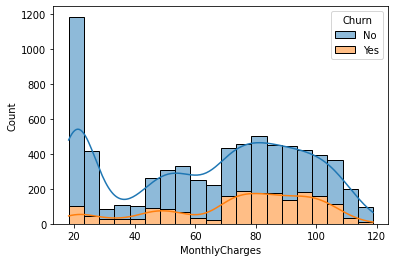

In [11]:
# Plot histogram of Total charges and churn

sns.histplot(x = df['MonthlyCharges'] , bins = 20, hue = df['Churn'] , multiple = 'stack',kde=True)

- Customer dengan monthly charge yang kecil cenderung untuk tidak churn. Namun, customer dengan monthly charge 70 hingga 105 banyak yang tidak lagi berlangganan dengan Telco. 

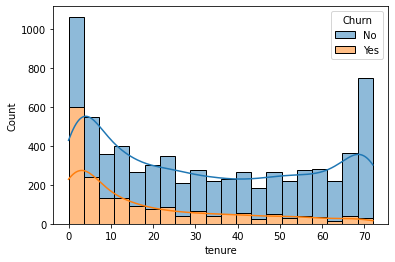

In [12]:
# Plot histogram of tenure and churn

sns.histplot(x = df['tenure'] , bins = 20, hue = df['Churn'] , multiple = 'stack',kde=True)

- Customer dengan jangka waktu berlangganan yang lebih singkat, lebih cenderung untuk churn. 

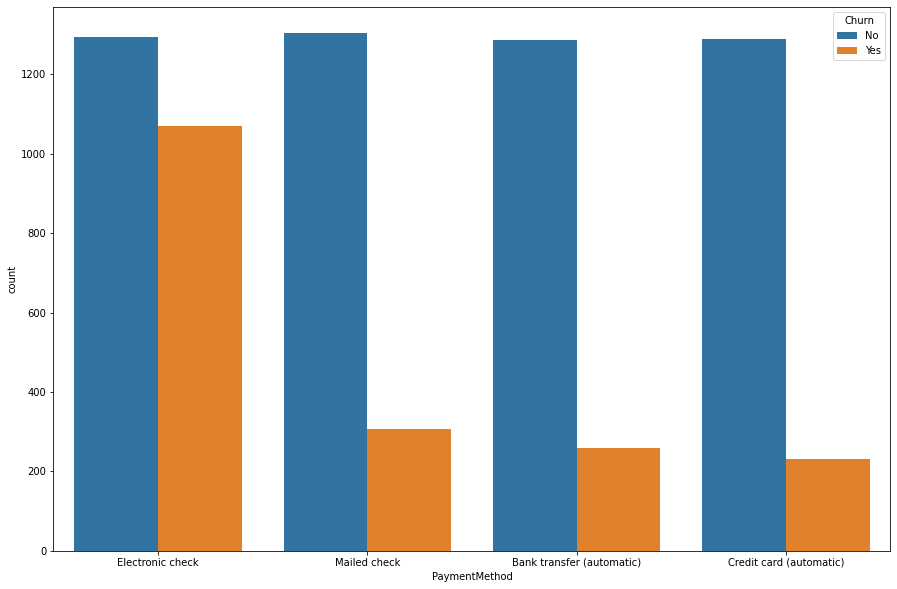

In [13]:
# Plot multiple lines and  churn

plt.figure(figsize=(15,10))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)

- Customer yang menggunakan electronic check paling banyak yang berhenti berlangganan dengan Telco.

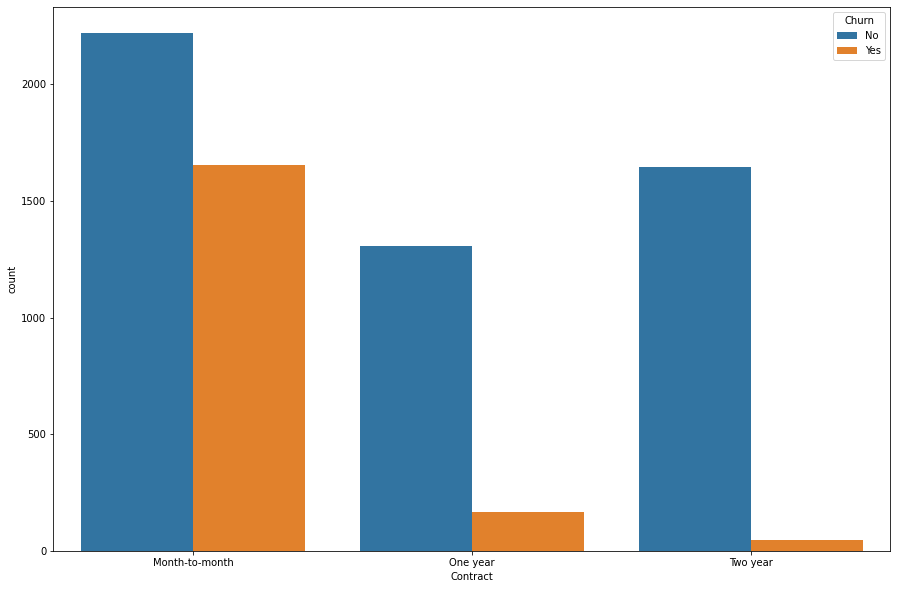

In [14]:
# Plot contract and churn

plt.figure(figsize=(15,10))
sns.countplot(x='Contract', hue='Churn', data=df)

- Customer Telco dengan tipe kontrak month-to-month paling banyak yang churn pada bulan berikutnya.


# **5 - Data Preprocessing**

Berdasarkan personal judgment, akan dilakukan drop untuk kolom `customerID` karena kolom ini tidak berpengaruh pada prediksi apakah customer akan churn atau tidak.

In [15]:
# Remove columns

df = df.drop(['customerID'], axis=1)

In [16]:
# Get Data for Model Inference

df_inf1 = df.sample(10, random_state=1)

df_inf1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3381,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
6180,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
4829,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No
3737,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
4249,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No
6835,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.30,No
3869,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.70,No
3943,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,No
3491,Male,0,Yes,No,44,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,No
6847,Female,0,Yes,Yes,18,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.80,No


In [17]:
# Remove Inference Set from Dataset

df_train_test = df.drop(df_inf1.index)

df_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [18]:
# Reset Index

df_train_test.reset_index(drop=True, inplace=True)
df_inf1.reset_index(drop=True, inplace=True)

df_inf1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No
1,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No
2,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No
3,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes
4,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No
5,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.30,No
6,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.70,No
7,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,No
8,Male,0,Yes,No,44,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,No
9,Female,0,Yes,Yes,18,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.80,No


## Splitting between `X` and `y`

In [19]:
# Splitting X and y

X = df_train_test.drop('Churn', axis =1)
y = df_train_test['Churn']

## Splitting Train Set, Validation Set, and Test Set

In [20]:
# Split train-set, val-set, and test-set

X_train_val, X_test, y_train_val, y_test = train_test_split (X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split (X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)
print('Val Size : ', X_val.shape)

Train Size :  (5081, 19)
Test Size :  (1055, 19)
Val Size :  (897, 19)


## Handling Outliers

In [21]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

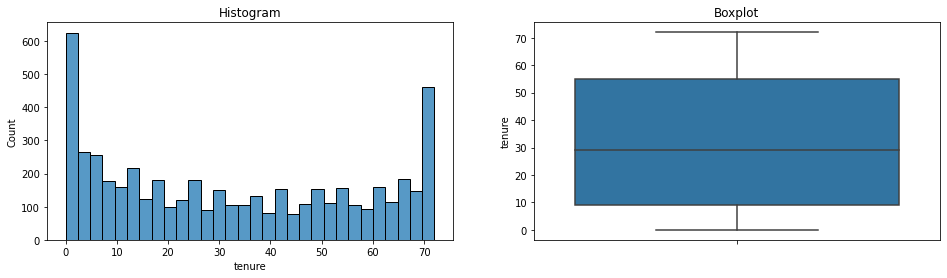


Skewness Value tenure:  0.21976017220869418


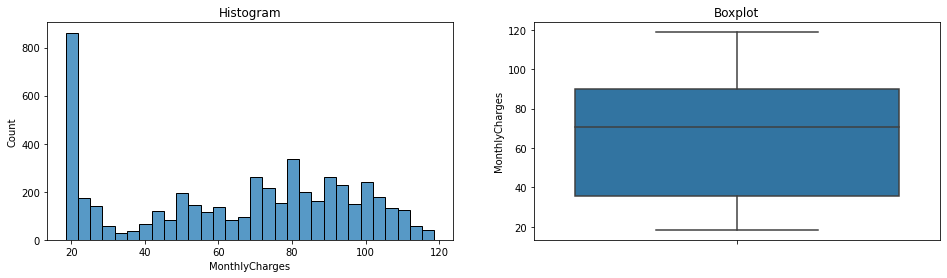


Skewness Value monthly charge :  -0.2289694644726281


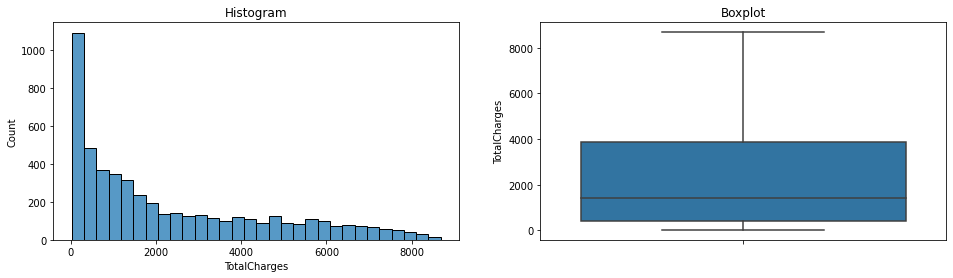


Skewness Value total charge :  0.9499456216421387


In [22]:
# Plot distribution of columns

diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value tenure: ', X_train['tenure'].skew())

diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value monthly charge : ', X_train['MonthlyCharges'].skew())

diagnostic_plots(X_train, 'TotalCharges')
print('\nSkewness Value total charge : ', X_train['TotalCharges'].skew())

Kolom `tenure` dan `MonthlyCharges` terdistribusi normal karena nilai skewness yang berada pada rentang -0.5 dan 0.5, sedangkan kolom `TotalCharges` terdistribusi right-skew. Dari boxplot masing-masing kolom, dapat disimpulkan tidak ada outlier pada kolom-kolom ini.

## Handling Missing Values

In [23]:
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64

In [24]:
X_val.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [25]:
X_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

- Terdapat missing values pada kolom `TotalCharges` pada train-set, test-set, dan validation-set. Kemungkinan ketika mengubah data type kolom total charges ada data yang tidak bisa diubah kedalam bentuk numerik, sehingga data-data tersebut diubah menjadi NaN.
- Kita akan menghandle missing values dengan imputasi nilai median yang akan dilakukan didalam pipeline preprocessing.

## Feature Selection

In [26]:
# feature selection using Chi Square 

X1 = df.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], axis=1)
y1 = df['Churn']

In [27]:
# Label encoding the features
label_encoder = LabelEncoder()

for col in X1.columns:
  X1[col]= label_encoder.fit_transform(X1[col])

# Label encoding the target
y1 = label_encoder.fit_transform(y1)

In [28]:
# Chi Scores
chi_scores = chi2(X1,y1)
chi_scores

(array([2.58698618e-01, 1.34351545e+02, 8.24120826e+01, 1.33036443e+02,
        9.72606249e-02, 9.74692078e+00, 9.82102823e+00, 5.51611529e+02,
        2.30086520e+02, 1.91303140e+02, 5.23303866e+02, 7.49020319e+00,
        8.23539949e+00, 1.11578017e+03, 1.05680863e+02, 5.84922505e+01]),
 array([6.11015635e-001, 4.57695863e-031, 1.10476396e-019, 8.87672856e-031,
        7.55142091e-001, 1.79623344e-003, 1.72527862e-003, 5.61588231e-122,
        5.70786894e-052, 1.65153873e-043, 8.08623624e-116, 6.20355560e-003,
        4.10811292e-003, 1.22794132e-244, 8.66198711e-025, 2.04093269e-014]))

PhoneService         7.551421e-01
gender               6.110156e-01
StreamingTV          6.203556e-03
StreamingMovies      4.108113e-03
MultipleLines        1.796233e-03
InternetService      1.725279e-03
PaymentMethod        2.040933e-14
Partner              1.104764e-19
PaperlessBilling     8.661987e-25
Dependents           8.876729e-31
SeniorCitizen        4.576959e-31
DeviceProtection     1.651539e-43
OnlineBackup         5.707869e-52
TechSupport         8.086236e-116
OnlineSecurity      5.615882e-122
Contract            1.227941e-244
dtype: float64


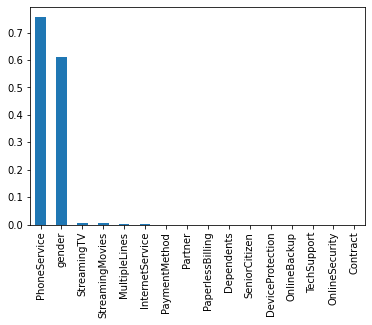

In [29]:
# See P-values and plot P-values
p_values = pd.Series(chi_scores[1],index = X1.columns)
p_values.sort_values(ascending = False , inplace = True)
print(p_values)

#Plot P-values
p_values.plot.bar()

Berdasarkan hasil feature importance diatas, `PhoneService` dan `gender` tidak memiliki nilai P-Value yaitu 0.6 dan 0.7, dimana nilai ini > 0.05, sehingga kita simpulkan bahwa kolom-kolom ini tidak memiliki signifikansi pada target variable.

In [30]:
# Remove columns

X_train = X_train.drop(['PhoneService', 'gender'], axis=1)
X_test = X_test.drop(['PhoneService', 'gender'], axis=1)
X_val = X_val.drop(['PhoneService', 'gender'], axis=1)

## Get Numerical Columns and Categorical Columns

In [31]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical columns : ', cat_columns)

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns :  ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## Pipeline

In [32]:
# Create A pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([('pipe_num', num_pipeline, num_columns),
                                    ('pipe_cat', cat_pipeline, cat_columns)
                                    ])

In [33]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

X_train.shape

(5081, 42)

In [34]:
# Encoding target

labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_val = labelencoder.transform(y_val)
y_test = labelencoder.transform(y_test)

## Handling Imbalance

In [35]:
# resampling X_train using SMOTEENN

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X_train, y_train)

print(f'Original train dataset shape: {Counter(y_train)}')

print(f'Resampled train dataset shape: {Counter(y_res)}\n')


Original train dataset shape: Counter({0: 3709, 1: 1372})
Resampled train dataset shape: Counter({0: 3709, 1: 3709})



# **6 - Sequential API**

## 6.1 - Model Definition

In [36]:
# change numpy array to tensor
train_dataset = tf.data.Dataset.from_tensor_slices((X_res, y_res))

# shuffle train dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

## Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(64)

In [37]:
# Create Sequential API

# Callbacks
callback = EarlyStopping(monitor='val_loss', patience=10)

#Optimizer
optimizer = Adam(lr=0.0001)

# Define the model
model_sequential = Sequential()

# Hidden Layer 1
model_sequential.add(Dense(10, input_shape=(42,), kernel_initializer='he_normal', activation='relu'))
#model_sequential.add(BatchNormalization())
model_sequential.add(Dropout(0.2))
# Output Layer
model_sequential.add(Dense(1, activation='sigmoid'))

# compile
model_sequential.compile(loss='binary_crossentropy', 
                         optimizer=optimizer,
                         metrics= [Recall(), 'accuracy'])


model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                430       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


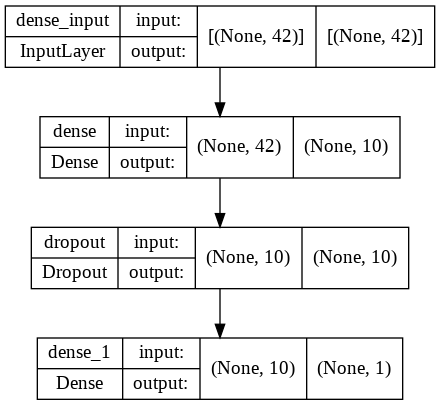

In [38]:
# plot layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

1. Model Sequential ini memiliki 3 layer yaitu input layer, 1 hidden layer, dan output layer.

  - Input layer terdiri dari 42 neurons, jumlah ini sama dengan jumlah features yang masuk kedalam model. 
  - Hidden layer terdiri atas 10 neurons, angka ini dipilih agar jumlah neuron dalam hidden layer tidak terlalu besar. Activation function yang digunakan dalam layer ini adalah Relu. Relu dipilih karena kecepatannya dalam komputasi. Lalu, kernel initializer adalah `He_normal`. kernel initializer ini dipilih karena tipe activation function yang digunakan adalah Relu.
  - Setelah hidden layer, ditambahkan dropout sebesar 0.2. Hal ini berarti 20% random neuron pada layer sebelumnya diabaikan pada layer setelahnya. Dropout ditambahkan untuk mencegah overfitting.
  -  Output layer terdiri atas 1 neuron, dengan activation function berupa sigmoid. Sigmoid dipilih karena kasus ini adalah klasifikasi binary.

2. Dari konstruksi model ini, terdapat 441 trainable parameter, yang merupakan weights dan bias dalam model.

3. Optimizer yang digunakan adalah Adam dengan learning rate 0.0001. learning rate yang terlalu tinggi dapat membuat training diverge, sedangkan optimizer yang terlalu kecil akan memakan waktu yang lama. Data yang kita miliki ini tidak terlalu banyak, sehingga learning rate yang kita gunakan tidak masalah.

4. Metrics yang digunakan adalah recall dan accuracy. Sedangkan loss-nya menggunakan binary_crossentropy.



## 6.2 - Model Training

Model training dengan epoch yang kita gunakan adalah 1000, dengan batch size yaitu 64 (jumlah batch size yang umum digunakan) dan akan menggunakan callback yaitu earlystopping.

In [39]:
# Train the model

%%time
history_seq = model_sequential.fit(train_dataset, validation_data=val_dataset, epochs=1000, batch_size=64, callbacks=[callback])

Epoch 1/1000
116/116 [==============================] - 4s 11ms/step - loss: 0.7326 - recall: 0.9108 - accuracy: 0.5617 - val_loss: 0.8477 - val_recall: 0.9317 - val_accuracy: 0.3857
Epoch 2/1000
116/116 [==============================] - 1s 6ms/step - loss: 0.7042 - recall: 0.8927 - accuracy: 0.5799 - val_loss: 0.7984 - val_recall: 0.9277 - val_accuracy: 0.4437
Epoch 3/1000
116/116 [==============================] - 1s 7ms/step - loss: 0.6731 - recall: 0.8830 - accuracy: 0.6171 - val_loss: 0.7559 - val_recall: 0.9197 - val_accuracy: 0.4983
Epoch 4/1000
116/116 [==============================] - 1s 6ms/step - loss: 0.6510 - recall: 0.8598 - accuracy: 0.6316 - val_loss: 0.7183 - val_recall: 0.9076 - val_accuracy: 0.5318
Epoch 5/1000
116/116 [==============================] - 1s 6ms/step - loss: 0.6343 - recall: 0.8568 - accuracy: 0.6511 - val_loss: 0.6858 - val_recall: 0.8996 - val_accuracy: 0.5630
Epoch 6/1000
116/116 [==============================] - 1s 5ms/step - loss: 0.6123 - reca

## 6.3 - Model Evaluation

In [40]:
# Create Dataframe

history_seq_df = pd.DataFrame(history_seq.history)

history_seq_df

,loss,recall,accuracy,val_loss,val_recall,val_accuracy
0,0.732596,0.910758,0.561742,0.847706,0.931727,0.385730
1,0.704215,0.892693,0.579941,0.798434,0.927711,0.443701
2,0.673140,0.882987,0.617148,0.755911,0.919679,0.498328
3,0.650992,0.859800,0.631572,0.718333,0.907631,0.531773
4,0.634250,0.856835,0.651119,0.685826,0.899598,0.562988
...,...,...,...,...,...,...
92,0.490818,0.793475,0.764222,0.513446,0.831325,0.733556
93,0.490769,0.785926,0.760313,0.513558,0.831325,0.732441
94,0.491355,0.788892,0.763413,0.513581,0.827309,0.731327
95,0.493493,0.787813,0.759774,0.513483,0.827309,0.732441


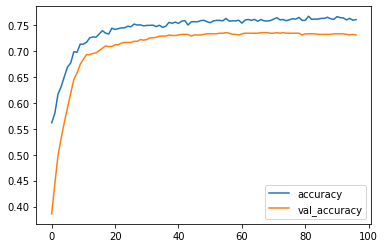

In [41]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

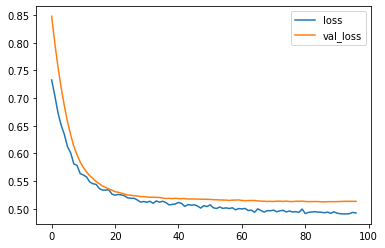

In [42]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

In [43]:
# Model Evaluation using Classification Report

from sklearn.metrics import classification_report  

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)
y_pred_seq

print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       808
           1       0.47      0.81      0.60       247

    accuracy                           0.74      1055
   macro avg       0.70      0.77      0.71      1055
weighted avg       0.82      0.74      0.76      1055



In [44]:
# Freeze model
model_sequential.trainable = False

- Hasil grafik accuracy vs val_accuracy menunjukkan hasil bahwa model masih overfit.
- Begitu pula dengan grafik loss vs val_loss menunjukkan hasil yang sama, yaitu model overfit. 
Dari hasil classification report didapatkan hasil recall 0.72 untuk kategori 0 dan 0.81 untuk kategori 1. Dengan akurasi sebesar 0.74. Hasil ini masih perlu untuk ditingkatkan kembali.
- Untuk mengurangi model overfit, kita akan melakukan improvement dengan cara mengurangi jumlah neuron pada hidden layer dari 10 menjadi 5.


# **7 - Model Improvement Sequential API**

In [45]:
# Create Sequential API

# Callbacks
callback = EarlyStopping(monitor='val_loss', patience=10)

#Optimizer
optimizer = Adam(lr=0.0001)

# Define the model
model_sequential1 = Sequential()

# Hidden Layer 1
model_sequential1.add(Dense(5, input_shape=(42,), kernel_initializer='he_normal', activation='relu'))
model_sequential1.add(Dropout(0.2))

# Output Layer
model_sequential1.add(Dense(1, activation='sigmoid'))

# compile
model_sequential1.compile(loss='binary_crossentropy', 
                         optimizer= optimizer,
                         metrics= [Recall(), 'accuracy'])


model_sequential1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 215       
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


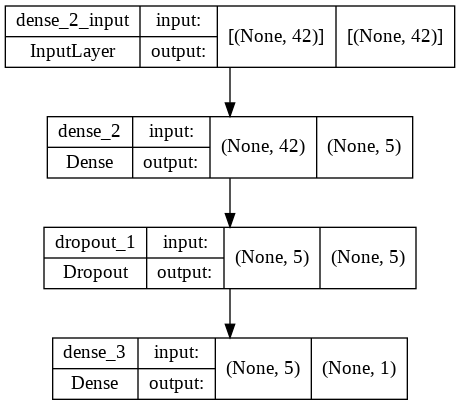

In [46]:
# plot layers

tf.keras.utils.plot_model(model_sequential1, show_shapes=True)

Konstruksi model yang digunakan sama seperti sebelumnya, yang berbeda hanya jumlah neurons pada hidden layer. Jumlahnya menjadi 5 dari yang sebelumnya 10. Sehingga, jumlah parameter berkurang menjadi 221.

In [47]:
# Train the model

%%time
history_seq2 = model_sequential1.fit(train_dataset, validation_data=val_dataset, epochs=1000, callbacks=[callback])

Epoch 1/1000
116/116 [==============================] - 1s 5ms/step - loss: 0.8238 - recall_1: 0.7617 - accuracy: 0.4697 - val_loss: 0.8928 - val_recall_1: 0.8795 - val_accuracy: 0.3099
Epoch 2/1000
116/116 [==============================] - 0s 2ms/step - loss: 0.7969 - recall_1: 0.7614 - accuracy: 0.4848 - val_loss: 0.8535 - val_recall_1: 0.8755 - val_accuracy: 0.3378
Epoch 3/1000
116/116 [==============================] - 0s 3ms/step - loss: 0.7712 - recall_1: 0.7584 - accuracy: 0.4976 - val_loss: 0.8167 - val_recall_1: 0.8715 - val_accuracy: 0.3668
Epoch 4/1000
116/116 [==============================] - 0s 3ms/step - loss: 0.7446 - recall_1: 0.7479 - accuracy: 0.5148 - val_loss: 0.7860 - val_recall_1: 0.8313 - val_accuracy: 0.3913
Epoch 5/1000
116/116 [==============================] - 0s 3ms/step - loss: 0.7206 - recall_1: 0.7441 - accuracy: 0.5450 - val_loss: 0.7589 - val_recall_1: 0.8474 - val_accuracy: 0.4303
Epoch 6/1000
116/116 [==============================] - 0s 3ms/step - 

In [48]:
# Create Dataframe

history_seq1_df = pd.DataFrame(history_seq2.history)

history_seq1_df

,loss,recall_1,accuracy,val_loss,val_recall_1,val_accuracy
0,0.823830,0.761661,0.469668,0.892829,0.879518,0.309922
1,0.796887,0.761391,0.484767,0.853492,0.875502,0.337793
2,0.771218,0.758425,0.497573,0.816733,0.871486,0.366778
3,0.744565,0.747910,0.514829,0.785957,0.831325,0.391304
4,0.720633,0.744136,0.545026,0.758933,0.847390,0.430323
...,...,...,...,...,...,...
169,0.504828,0.781612,0.762739,0.528592,0.795181,0.745819
170,0.505733,0.780534,0.762065,0.528470,0.795181,0.745819
171,0.503915,0.786465,0.766379,0.528998,0.795181,0.745819
172,0.503279,0.782691,0.767997,0.529016,0.795181,0.745819


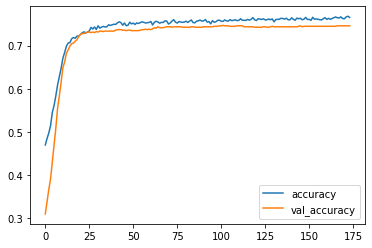

In [49]:
# Plot between Accuracy and val_accuracy

history_seq1_df[['accuracy', 'val_accuracy']].plot()

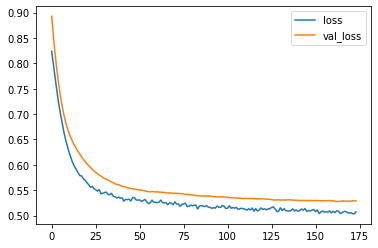

In [50]:
# Plot between loss and val_loss

history_seq1_df[['loss', 'val_loss']].plot()

In [51]:
# Model Evaluation using Classification Report

from sklearn.metrics import classification_report  

y_pred_seq1 = model_sequential1.predict(X_test)
y_pred_seq1 = np.where(y_pred_seq >= 0.5, 1, 0)
y_pred_seq1

print(classification_report(y_test, y_pred_seq1))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       808
           1       0.47      0.81      0.60       247

    accuracy                           0.74      1055
   macro avg       0.70      0.77      0.71      1055
weighted avg       0.82      0.74      0.76      1055



In [52]:
# Freeze model
model_sequential1.trainable = False

Dari hasil kedua grafik dapat dilihat bahwa model masih overfit namun sedikit lebih baik dari sebelum dilakukan pengurangan jumlah neuron.
Adapun dari hasil classification report, nilai recall, f1-score, dan accuracy tidak ada perubahan.

# **8 - Functional API**

## 8.1 - Model Definition

In [53]:
# Create functional Model

# Callbacks
callback = EarlyStopping(monitor='val_loss', patience=10)

#Optimizer
optimizer = Adam(lr=0.0001)

input_layer = Input(shape=(42,))
hidden_layer = Dense(5, activation='relu', kernel_initializer='he_normal',  kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_layer)
dropout = Dropout(0.2)(hidden_layer)
output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_normal',  kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout)

model_functional= Model(inputs=input_layer, outputs= output_layer)

# compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer=optimizer,
                         metrics = ['accuracy', Recall()])

model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42)]              0         
                                                                 
 dense_4 (Dense)             (None, 5)                 215       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


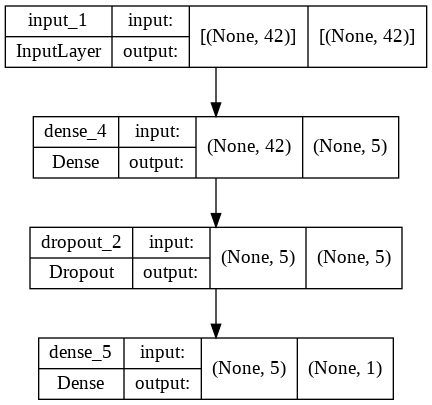

In [54]:
# Plot models

tf.keras.utils.plot_model(model_functional, show_shapes=True)

Meskipun model functional memungkinkan kita untuk menyusun layer secara tidak sequential, namun model functional yang saya buat tetap tersusun secara sequential, bahkan konstruksi model ini sama dengan konstruksi model setelah improvement.
Hanya saja, ditambahkan regularization l2 pada hidden layer dan output layer. Teknik ini digunakan untuk mengurangi overfit.


## 8.2 - Model Traning

In [55]:
# Train the model

%%time
history_func = model_functional.fit(train_dataset, validation_data=val_dataset, epochs=1000, callbacks=[callback])

Epoch 1/1000
116/116 [==============================] - 2s 6ms/step - loss: 0.8246 - accuracy: 0.5375 - recall_2: 0.5807 - val_loss: 0.8379 - val_accuracy: 0.5039 - val_recall_2: 0.6024
Epoch 2/1000
116/116 [==============================] - 0s 3ms/step - loss: 0.8060 - accuracy: 0.5605 - recall_2: 0.5921 - val_loss: 0.8203 - val_accuracy: 0.5318 - val_recall_2: 0.6305
Epoch 3/1000
116/116 [==============================] - 0s 3ms/step - loss: 0.7877 - accuracy: 0.5865 - recall_2: 0.6169 - val_loss: 0.8041 - val_accuracy: 0.5563 - val_recall_2: 0.6546
Epoch 4/1000
116/116 [==============================] - 0s 3ms/step - loss: 0.7748 - accuracy: 0.5995 - recall_2: 0.6304 - val_loss: 0.7899 - val_accuracy: 0.5753 - val_recall_2: 0.6667
Epoch 5/1000
116/116 [==============================] - 0s 3ms/step - loss: 0.7584 - accuracy: 0.6205 - recall_2: 0.6479 - val_loss: 0.7776 - val_accuracy: 0.6020 - val_recall_2: 0.6667
Epoch 6/1000
116/116 [==============================] - 0s 2ms/step - 

## 8.3 - Model Evaluation

In [56]:
# Create Dataframe

history_func_df = pd.DataFrame(history_func.history)

history_func_df

,loss,accuracy,recall_2,val_loss,val_accuracy,val_recall_2
0,0.824617,0.537476,0.580750,0.837918,0.503902,0.602410
1,0.806032,0.560528,0.592073,0.820298,0.531773,0.630522
2,0.787749,0.586546,0.616878,0.804144,0.556299,0.654619
3,0.774801,0.599488,0.630359,0.789903,0.575251,0.666667
4,0.758425,0.620518,0.647884,0.777639,0.602007,0.666667
...,...,...,...,...,...,...
195,0.539486,0.751685,0.755460,0.553028,0.746934,0.803213
196,0.537575,0.753707,0.755460,0.553101,0.746934,0.803213
197,0.537297,0.752090,0.760582,0.552526,0.745819,0.799197
198,0.536113,0.756808,0.761122,0.552563,0.745819,0.799197


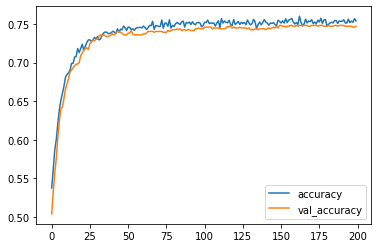

In [57]:
# Plot between Accuracy and val_accuracy

history_func_df[['accuracy', 'val_accuracy']].plot()

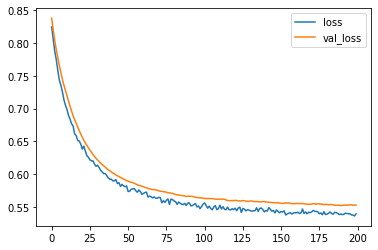

In [58]:
# Plot between loss and val_loss

history_func_df[['loss', 'val_loss']].plot()

In [59]:
# Model Evaluation using Classification Report

from sklearn.metrics import classification_report  


y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)
y_pred_func

print(classification_report(y_test, y_pred_func))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       808
           1       0.49      0.81      0.61       247

    accuracy                           0.76      1055
   macro avg       0.71      0.77      0.71      1055
weighted avg       0.82      0.76      0.77      1055



In [60]:
# Freeze model
model_functional.trainable = False

- Hasil grafik val_loss vs loss diatas menunjukkan bahwa model menjadi sedikit lebih tidak overfit. 
- Nilai recall untuk kategori 1 tidak berubah, sedangkan nilai recall untuk kategori 0 naik 0.02 dari sebelumnya menjadi 0.74. Sedangkan nilai f1-score kedua kategori tidak berubah. 
- Accuracy score bertambah dari 0.74 menjadi 0.76.
- Karena adanya peningkatan ini meskipun sangat kecil, maka kita akan memilih model functional sebagai final model kita.


# **9 - Model Saving**

In [61]:
# Save files

model_functional.save('model_churn1')

! zip -r model_churn1.zip model_churn1
    
with open('final_pipeline.pkl', 'wb') as file_1:
    joblib.dump(final_pipeline, file_1)


  adding: model_churn1/ (stored 0%)
  adding: model_churn1/variables/ (stored 0%)
  adding: model_churn1/variables/variables.index (deflated 60%)
  adding: model_churn1/variables/variables.data-00000-of-00001 (deflated 50%)
  adding: model_churn1/keras_metadata.pb (deflated 85%)
  adding: model_churn1/saved_model.pb (deflated 89%)
  adding: model_churn1/assets/ (stored 0%)


#**10 - Model Inference**

In [62]:
# Load the Model

with open('final_pipeline.pkl', 'rb') as file_1:
  pipe = joblib.load(file_1)

In [63]:
# Preprocessing Data Inference

df_inf = final_pipeline.transform(df_inf1)

In [64]:
# Predict 

y_pred = model_functional.predict(df_inf)
y_pred = np.where(y_pred >= 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [65]:
# Transform back to the original category
y_pred1= labelencoder.inverse_transform(y_pred)

In [66]:
# Create DataFrame of Churn Prediction

pred_inf = pd.DataFrame(y_pred1, columns=['Churn Prediction'])

df_final = pd.concat([df_inf1, pred_inf], axis=1)

df_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Prediction
0,Female,0,No,No,41,Yes,No,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75,No,No
1,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,...,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No,No
2,Female,0,No,No,12,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35,No,Yes
3,Female,0,No,No,5,Yes,Yes,DSL,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95,Yes,Yes
4,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,...,No,No,Yes,One year,Yes,Mailed check,65.90,660.05,No,No
5,Male,0,Yes,No,67,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,One year,Yes,Bank transfer (automatic),88.40,5798.30,No,No
6,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.70,No,Yes
7,Male,1,No,No,1,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,No,Yes
8,Male,0,Yes,No,44,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,No,No
9,Female,0,Yes,Yes,18,Yes,No,DSL,No,No,...,No,Yes,No,Month-to-month,No,Mailed check,55.95,1082.80,No,No


# **11 - Conlusions**

## EDA Analysis

- 73.5% customer telco churn, sedangkan 26.5% nya tidak churn. Dataset yang kita miliki imbalance, sehingga dilakukan handling imbalance pada preprocessing.
- Histogram `tenure` memiliki 2 peak.
- Kolom `TotalCharges` terdistribusi secara skew.
- Jumlah customer Telco yang berjenis kelamin laki-laki dan perempuan tidak jauh berbeda.
- Paling banyak customer Telco tidak memiliki partner.
- Kebanyakan customer Telco tidak memiliki dependents dan bukan merupakan senior citizen.
- Mayoritas customer telco berlangganan Phone Service.
- Customer Telco yang berlangganan Phone Service lebih banyak yang tidak memliki multiple lines, namun selisih customer yang tidak memiliki multiple lines dengan yang memiliki multiple lines tidak begitu besar.
- Customer dengan monthly charge yang kecil cenderung untuk tidak churn. Namun, customer dengan monthly charge 70 hingga 105 banyak yang tidak lagi berlangganan dengan Telco. 
- Customer dengan jangka waktu berlangganan yang lebih singkat, lebih cenderung untuk churn. 
- Customer yang menggunakan electronic check paling banyak yang berhenti berlangganan dengan Telco.
- Customer Telco dengan tipe kontrak month-to-month paling banyak yang churn pada bulan berikutnya.
- Saran terkait eda, yaitu melakukan analisis lebih lanjut dan strategi khusus pada tipe2 customer yang cenderung churn. Seperti misalnya pada customer dengan monthly charge yang tinggi. 

## Model Analysis

### Model Sequential

1. Model Sequential ini memiliki 3 layer yaitu input layer, 1 hidden layer, dan output layer.

  - Input layer terdiri dari 42 neurons, jumlah ini sama dengan jumlah features yang masuk kedalam model. 
  - Hidden layer terdiri atas 10 neurons, angka ini dipilih agar jumlah neuron dalam hidden layer tidak terlalu besar. Activation function yang digunakan dalam layer ini adalah Relu. Relu dipilih karena kecepatannya dalam komputasi. Lalu, kernel initializer adalah `He_normal`. kernel initializer ini dipilih karena tipe activation function yang digunakan adalah Relu.
  - Setelah hidden layer, ditambahkan dropout sebesar 0.2. Hal ini berarti 20% random neuron pada layer sebelumnya diabaikan pada layer setelahnya. Dropout ditambahkan untuk mencegah overfitting.
  -  Output layer terdiri atas 1 neuron, dengan activation function berupa sigmoid. Sigmoid dipilih karena kasus ini adalah klasifikasi binary.

2. Dari konstruksi model ini, terdapat 441 trainable parameter, yang merupakan weights dan bias dalam model.

3. Optimizer yang digunakan adalah Adam dengan learning rate 0.0001. learning rate yang terlalu tinggi dapat membuat training diverge, sedangkan optimizer yang terlalu kecil akan memakan waktu yang lama. Data yang kita miliki ini tidak terlalu banyak, sehingga learning rate yang kita gunakan tidak masalah.

4. Metrics yang digunakan adalah recall dan accuracy. Sedangkan loss-nya menggunakan binary_crossentropy.

5. Model Training: 
  - Model training dengan epoch yang kita gunakan adalah 1000, dengan batch size yaitu 64 (jumlah batch size yang umum digunakan) dan akan menggunakan callback yaitu earlystopping.

6. Model Evaluation : 
  - Hasil grafik accuracy vs val_accuracy menunjukkan hasil bahwa model masih overfit.
  - Begitu pula dengan grafik loss vs val_loss menunjukkan hasil yang sama, yaitu model overfit. 
  - Dari hasil classification report didapatkan hasil recall 0.72 untuk kategori 0 dan 0.81 untuk kategori 1. Dengan akurasi sebesar 0.74. Hasil ini masih perlu untuk ditingkatkan kembali.
  - Untuk mengurangi model overfit, kita akan melakukan improvement dengan cara mengurangi jumlah neuron pada hidden layer dari 10 menjadi 5.

7. Model Improvements:
  - Konstruksi model yang digunakan sama seperti sebelumnya, yang berbeda hanya jumlah neurons pada hidden layer. Jumlahnya menjadi 5 dari yang sebelumnya 10. Sehingga, jumlah parameter berkurang menjadi 221.

  - Dari hasil kedua grafik dapat dilihat bahwa model masih overfit namun sedikit lebih baik dari sebelum dilakukan pengurangan jumlah neuron.
Adapun dari hasil classification report, nilai recall, f1-score, dan accuracy tidak ada perubahan.


### Model Functional

1. Meskipun model functional memungkinkan kita untuk menyusun layer secara tidak sequential, namun model functional yang saya buat tetap tersusun secara sequential, bahkan konstruksi model ini sama dengan konstruksi model setelah improvement.
Hanya saja, ditambahkan regularization l2 pada hidden layer dan output layer. Teknik ini digunakan untuk mengurangi overfit.

2. Model Training:
  - Model training dengan epoch yang kita gunakan adalah 1000, dengan batch size yaitu 64 (jumlah batch size yang umum digunakan) dan akan menggunakan callback yaitu earlystopping.

3. Model Evaluation : 
  - Hasil grafik val_loss vs loss diatas menunjukkan bahwa model menjadi sedikit lebih tidak overfit. 
  - Nilai recall untuk kategori 1 tidak berubah, sedangkan nilai recall untuk kategori 0 naik 0.02 dari sebelumnya menjadi 0.74. Sedangkan nilai f1-score kedua kategori tidak berubah. 
  - Accuracy score bertambah dari 0.74 menjadi 0.76.
  - Karena adanya peningkatan ini meskipun sangat kecil, maka kita akan memilih model functional sebagai final model kita.


### Recommendation

Hasil model functional masih perlu dilakukan optimisasi, dapat dengan cara melakukan tuning activation function,learning rate, dropout rate, epochs, dan jumlah neurons. Atau bisa juga dengan menambahkan data.